## Regression Analysis


### California Housing Dataset from Kaggle

* Download California Housing Dataset from Kaggle
* Load Data in a Pandas Data-Frame

**dataset: **  https://www.kaggle.com/camnugent/california-housing-prices

In [85]:
import os
import pandas as pd
LOCAL_DIR = os.path.join("data", "housing.csv")
df = pd.read_csv(LOCAL_DIR)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [86]:
df.shape

(20640, 10)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [88]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Handling Categorical Features

In [89]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [90]:
df = df[df["ocean_proximity"] != 'ISLAND'] #imbalanced data, get rid of this , it shouldn't help in our prediction
df.shape

(20635, 10)

In [91]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

In [92]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**One Hot Encoding**

In [93]:
#One Hot Encoding
df = pd.get_dummies(df)

In [94]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


**Label Encoding**

In [95]:
# #lable Encoding
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# # le.fit(df['ocean_proximity'])
# # list(le.classes_)
# # le.transform(df['ocean_proximity']) 
# dfLabel = df.copy()
# dfLabel['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])
# dfLabel.head()


In [96]:
# list(le.classes_)

In [97]:
# df["ocean_proximity"].value_counts()

### Data Exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd91e7c630>,
      dtype=object)

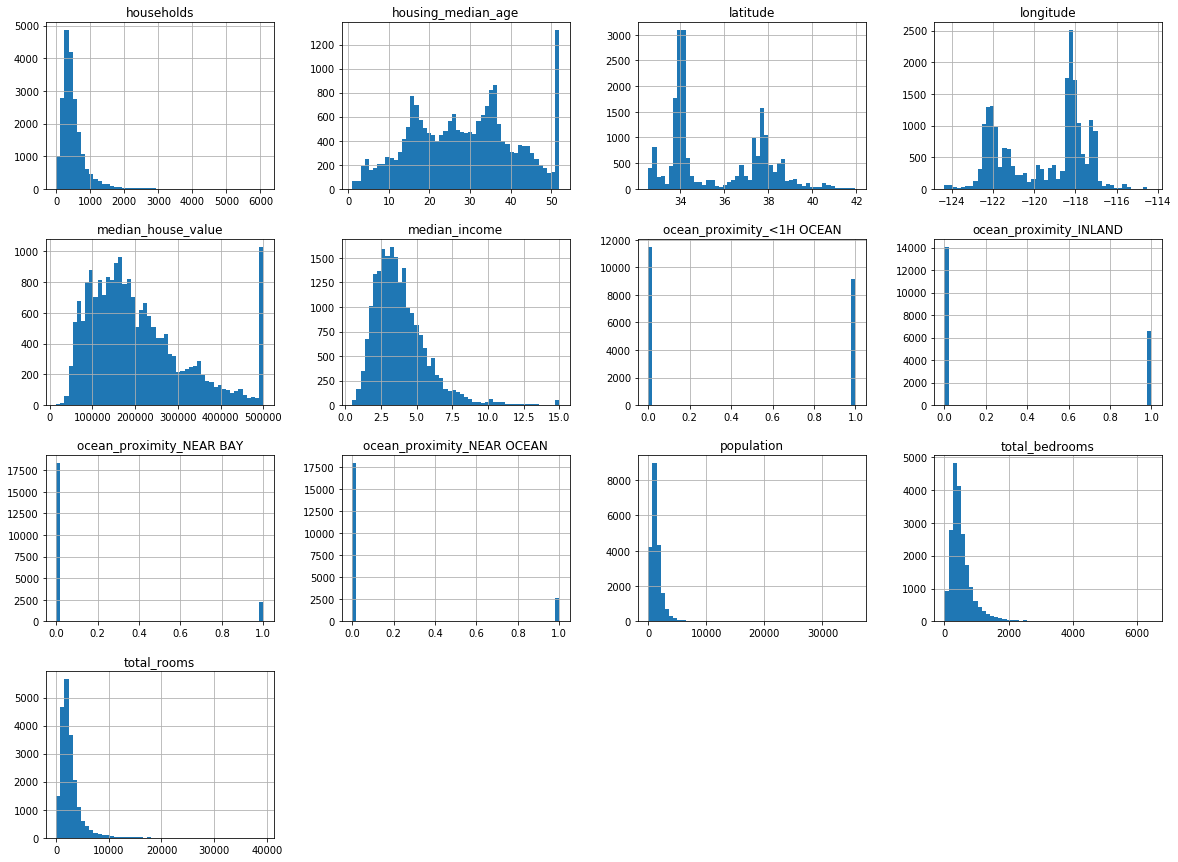

In [98]:
df.hist(bins=50, figsize=(20,15))

### Data cleaning: handling missing values 

#### Three ways to Deal with Missing Values
** 1. Drop the rows containing missing values **  
** 2. Drop the whole column that has missing values **  
** 3. For Numerical columns, Impute (estimate) the values with mean, median or some other statistic of the column **  

In [99]:
#df.dropna(subset=["total_bedrooms"]) # option 1
#df.drop("total_bedrooms", axis=1) # option 2
#median = df["total_bedrooms"].median()
#df["total_bedrooms"].fillna(median) # option 3

# from sklearn.preprocessing import Imputer
# imputer = Imputer(strategy="median")
# inputed = imiputer.fit_transform()
# imputed
# df = pd.DataFrame(imputed,columns=df.columns)
# df.info()

In [100]:
df.info() # there are some missing values in  total_bedrooms  column       

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20635 entries, 0 to 20639
Data columns (total 13 columns):
longitude                     20635 non-null float64
latitude                      20635 non-null float64
housing_median_age            20635 non-null float64
total_rooms                   20635 non-null float64
total_bedrooms                20428 non-null float64
population                    20635 non-null float64
households                    20635 non-null float64
median_income                 20635 non-null float64
median_house_value            20635 non-null float64
ocean_proximity_<1H OCEAN     20635 non-null uint8
ocean_proximity_INLAND        20635 non-null uint8
ocean_proximity_NEAR BAY      20635 non-null uint8
ocean_proximity_NEAR OCEAN    20635 non-null uint8
dtypes: float64(9), uint8(4)
memory usage: 1.7 MB


In [102]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputed = imputer.fit_transform(df)
imputed

array([[-122.23,   37.88,   41.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.22,   37.86,   21.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.24,   37.85,   52.  , ...,    0.  ,    1.  ,    0.  ],
       ...,
       [-121.22,   39.43,   17.  , ...,    1.  ,    0.  ,    0.  ],
       [-121.32,   39.43,   18.  , ...,    1.  ,    0.  ,    0.  ],
       [-121.24,   39.37,   16.  , ...,    1.  ,    0.  ,    0.  ]])

In [103]:
df = pd.DataFrame(imputed,columns=df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20635 entries, 0 to 20634
Data columns (total 13 columns):
longitude                     20635 non-null float64
latitude                      20635 non-null float64
housing_median_age            20635 non-null float64
total_rooms                   20635 non-null float64
total_bedrooms                20635 non-null float64
population                    20635 non-null float64
households                    20635 non-null float64
median_income                 20635 non-null float64
median_house_value            20635 non-null float64
ocean_proximity_<1H OCEAN     20635 non-null float64
ocean_proximity_INLAND        20635 non-null float64
ocean_proximity_NEAR BAY      20635 non-null float64
ocean_proximity_NEAR OCEAN    20635 non-null float64
dtypes: float64(13)
memory usage: 2.0 MB


### Creating Train and Test Sets and Finding Correlation

**pearson's correlation formula**

* captures only linear relationship
* ranges from -1 to +1
* -1 indicated perfect negative correlation, +1 indicate perfect positive correlation


<p><img src="imgs/download11.png" alt="Example" width="420" height="220">

In [104]:
corr_matrix = df.corr() # finding all the correlation
print(corr_matrix)

                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924676           -0.108394   
latitude                    -0.924676  1.000000            0.011462   
housing_median_age          -0.108394  0.011462            1.000000   
total_rooms                  0.044642 -0.036231           -0.361268   
total_bedrooms               0.069164 -0.066565           -0.319061   
population                   0.099881 -0.108978           -0.296172   
households                   0.055400 -0.071199           -0.302863   
median_income               -0.015090 -0.079977           -0.118949   
median_house_value          -0.046208 -0.143837            0.105272   
ocean_proximity_<1H OCEAN    0.321297 -0.447303            0.045551   
ocean_proximity_INLAND      -0.055480  0.351058           -0.236537   
ocean_proximity_NEAR BAY    -0.474465  0.358735            0.255333   
ocean_proximity_NEAR OCEAN   0.045568 -0.160942            0.021729   

     

In [105]:
corr_matrix['median_income'].sort_values(ascending = False) # interested in only target variable correlation
# which variables are important for our prediction

median_income                 1.000000
median_house_value            0.688563
total_rooms                   0.197991
ocean_proximity_<1H OCEAN     0.168772
ocean_proximity_NEAR BAY      0.056150
ocean_proximity_NEAR OCEAN    0.027290
households                    0.012950
population                    0.004737
total_bedrooms               -0.007660
longitude                    -0.015090
latitude                     -0.079977
housing_median_age           -0.118949
ocean_proximity_INLAND       -0.237618
Name: median_income, dtype: float64

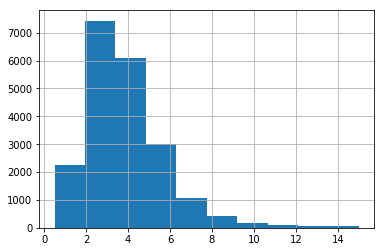

In [106]:
df['median_income'].hist()

**stratifying/classifying numerical to categorical variable**

In [107]:
import numpy as np
buckets = np.linspace(0,16,6)
df['median_income_cats'] = pd.cut(df['median_income'], buckets)

In [108]:
df['median_income_cats'].value_counts()

(3.2, 6.4]     10231
(0, 3.2]        8655
(6.4, 9.6]      1407
(9.6, 12.8]      256
(12.8, 16]        86
Name: median_income_cats, dtype: int64

In [109]:
df['median_income_cats'].value_counts()/len(df) # proportions

(3.2, 6.4]     0.495808
(0, 3.2]       0.419433
(6.4, 9.6]     0.068185
(9.6, 12.8]    0.012406
(12.8, 16]     0.004168
Name: median_income_cats, dtype: float64

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(df,test_size=0.2,stratify= df['median_income_cats'],
                                  shuffle = True,random_state=144)

In [111]:
X_train['median_income_cats'].value_counts()/len(X_train)

(3.2, 6.4]     0.495820
(0, 3.2]       0.419433
(6.4, 9.6]     0.068149
(9.6, 12.8]    0.012418
(12.8, 16]     0.004180
Name: median_income_cats, dtype: float64

In [112]:
X_test['median_income_cats'].value_counts()/len(X_test)

(3.2, 6.4]     0.495760
(0, 3.2]       0.419433
(6.4, 9.6]     0.068331
(9.6, 12.8]    0.012358
(12.8, 16]     0.004119
Name: median_income_cats, dtype: float64

In [113]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_income_cats
4570,-118.27,34.06,30.0,1771.0,788.0,2188.0,764.0,1.5885,154200.0,1.0,0.0,0.0,0.0,"(0, 3.2]"
12057,-117.58,33.87,17.0,2772.0,449.0,1685.0,461.0,5.0464,163900.0,0.0,1.0,0.0,0.0,"(3.2, 6.4]"
20281,-119.17,34.17,32.0,1567.0,304.0,1482.0,308.0,3.5867,182100.0,0.0,0.0,0.0,1.0,"(3.2, 6.4]"
19871,-119.31,36.33,46.0,1636.0,338.0,772.0,332.0,2.4250,84900.0,0.0,1.0,0.0,0.0,"(0, 3.2]"
15204,-117.08,33.01,5.0,5659.0,931.0,2565.0,902.0,6.1949,238700.0,1.0,0.0,0.0,0.0,"(3.2, 6.4]"


In [114]:
X_train,X_valid = train_test_split(X_train,test_size=0.15,
                                  stratify= X_train['median_income_cats'],
                                  shuffle = True,random_state=144)

In [115]:
X_train['median_income_cats'].value_counts()/len(X_train)

(3.2, 6.4]     0.495831
(0, 3.2]       0.419428
(6.4, 9.6]     0.068135
(9.6, 12.8]    0.012401
(12.8, 16]     0.004205
Name: median_income_cats, dtype: float64

In [116]:
X_valid['median_income_cats'].value_counts()/len(X_valid)

(3.2, 6.4]     0.495761
(0, 3.2]       0.419459
(6.4, 9.6]     0.068228
(9.6, 12.8]    0.012515
(12.8, 16]     0.004037
Name: median_income_cats, dtype: float64

In [117]:
X_train.shape,X_valid.shape,X_test.shape

((14031, 14), (2477, 14), (4127, 14))

In [118]:
y_train = X_train['median_house_value'].copy()
y_valid = X_valid['median_house_value'].copy()
y_test = X_test['median_house_value'].copy()

In [119]:
y_train.shape,y_valid.shape,y_test.shape

((14031,), (2477,), (4127,))

In [120]:
X_train.drop('median_house_value',axis=1,inplace=True)
X_valid.drop('median_house_value',axis=1,inplace=True)
X_test.drop('median_house_value',axis=1,inplace=True)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [121]:
X_train.shape,X_valid.shape,X_test.shape

((14031, 13), (2477, 13), (4127, 13))

In [122]:
X_train.drop('median_income_cats',axis=1,inplace=True)
X_valid.drop('median_income_cats',axis=1,inplace=True)
X_test.drop('median_income_cats',axis=1,inplace=True)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [123]:
X_train.shape,X_valid.shape,X_test.shape

((14031, 12), (2477, 12), (4127, 12))

In [124]:
y_train.shape,y_valid.shape,y_test.shape

((14031,), (2477,), (4127,))

In [125]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2473,-119.86,36.43,34.0,1175.0,251.0,683.0,261.0,1.7176,0.0,1.0,0.0,0.0
14565,-117.21,32.83,35.0,2259.0,501.0,1340.0,511.0,3.4482,0.0,0.0,0.0,1.0
5391,-118.39,34.03,39.0,1366.0,375.0,1237.0,370.0,3.7206,1.0,0.0,0.0,0.0
9579,-120.49,37.32,13.0,3474.0,927.0,2149.0,821.0,1.9528,0.0,1.0,0.0,0.0
12649,-121.45,38.52,37.0,1477.0,321.0,888.0,312.0,2.5592,0.0,1.0,0.0,0.0


In [126]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2542,-124.17,40.80,52.0,1557.0,344.0,758.0,319.0,1.8529,0.0,0.0,0.0,1.0
2221,-119.84,36.82,17.0,2807.0,376.0,996.0,353.0,5.5357,0.0,1.0,0.0,0.0
2226,-119.78,36.86,10.0,2902.0,363.0,1200.0,363.0,8.3608,0.0,1.0,0.0,0.0
8114,-118.19,33.80,41.0,2125.0,591.0,1604.0,555.0,2.9943,0.0,0.0,0.0,1.0
11265,-117.99,33.78,15.0,4273.0,993.0,2300.0,946.0,3.5313,1.0,0.0,0.0,0.0


In [127]:
y_train.head()

2473      58400.0
14565    162500.0
5391     230900.0
9579      85300.0
12649     70300.0
Name: median_house_value, dtype: float64

In [128]:
y_valid.head()

11926    109100.0
19274    146000.0
9459     110400.0
14956    249400.0
2067      74200.0
Name: median_house_value, dtype: float64

In [129]:
y_test.head()

2542      62500.0
2221     167700.0
2226     187300.0
8114     190600.0
11265    213000.0
Name: median_house_value, dtype: float64

## California Housing Dataset from sklearn package  

In [130]:
from sklearn.datasets import fetch_california_housing

In [131]:
housing = fetch_california_housing(data_home=None, download_if_missing=True)
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [132]:
df2 = pd.DataFrame(housing.data,columns=housing.feature_names)
df2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


## Linear Regression

In [134]:
import os
import pandas as pd
LOCAL_FILE = os.path.join('data','housing.csv')
df = pd.read_csv(LOCAL_FILE)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [135]:
df["ocean_proximity"].value_counts()
df = df[df["ocean_proximity"] != 'ISLAND']
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

In [136]:
#One Hot Encoding
df = pd.get_dummies(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


### Three ways to Deal with Missing Values
#### 1. Drop the rows containing missing values
#### 2. Drop the whole column that has missing values
#### 3. For Numerical columns, Impute (estimate) the values with mean, median or some other statistic of the column

In [137]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed,columns=df.columns)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20635 entries, 0 to 20634
Data columns (total 13 columns):
longitude                     20635 non-null float64
latitude                      20635 non-null float64
housing_median_age            20635 non-null float64
total_rooms                   20635 non-null float64
total_bedrooms                20635 non-null float64
population                    20635 non-null float64
households                    20635 non-null float64
median_income                 20635 non-null float64
median_house_value            20635 non-null float64
ocean_proximity_<1H OCEAN     20635 non-null float64
ocean_proximity_INLAND        20635 non-null float64
ocean_proximity_NEAR BAY      20635 non-null float64
ocean_proximity_NEAR OCEAN    20635 non-null float64
dtypes: float64(13)
memory usage: 2.0 MB


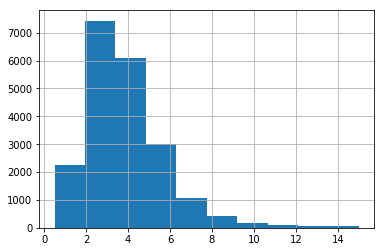

In [139]:
df['median_income'].hist()

In [140]:
import numpy as np
buckets = np.linspace(0,16,6)
df['median_income_cats'] = pd.cut(df['median_income'], buckets)

In [141]:
df['median_income_cats'].value_counts()/len(df)

(3.2, 6.4]     0.495808
(0, 3.2]       0.419433
(6.4, 9.6]     0.068185
(9.6, 12.8]    0.012406
(12.8, 16]     0.004168
Name: median_income_cats, dtype: float64

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(df,test_size=0.2,stratify= df['median_income_cats'],
                                  shuffle = True,random_state=144)

In [143]:
X_train['median_income_cats'].value_counts()/len(X_train)

(3.2, 6.4]     0.495820
(0, 3.2]       0.419433
(6.4, 9.6]     0.068149
(9.6, 12.8]    0.012418
(12.8, 16]     0.004180
Name: median_income_cats, dtype: float64

In [144]:
X_test['median_income_cats'].value_counts()/len(X_test)

(3.2, 6.4]     0.495760
(0, 3.2]       0.419433
(6.4, 9.6]     0.068331
(9.6, 12.8]    0.012358
(12.8, 16]     0.004119
Name: median_income_cats, dtype: float64

In [145]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_income_cats
4570,-118.27,34.06,30.0,1771.0,788.0,2188.0,764.0,1.5885,154200.0,1.0,0.0,0.0,0.0,"(0, 3.2]"
12057,-117.58,33.87,17.0,2772.0,449.0,1685.0,461.0,5.0464,163900.0,0.0,1.0,0.0,0.0,"(3.2, 6.4]"
20281,-119.17,34.17,32.0,1567.0,304.0,1482.0,308.0,3.5867,182100.0,0.0,0.0,0.0,1.0,"(3.2, 6.4]"
19871,-119.31,36.33,46.0,1636.0,338.0,772.0,332.0,2.4250,84900.0,0.0,1.0,0.0,0.0,"(0, 3.2]"
15204,-117.08,33.01,5.0,5659.0,931.0,2565.0,902.0,6.1949,238700.0,1.0,0.0,0.0,0.0,"(3.2, 6.4]"


In [146]:
X_train,X_valid = train_test_split(X_train,test_size=0.15,
                                  stratify= X_train['median_income_cats'],
                                  shuffle = True,random_state=144)

In [147]:
X_train['median_income_cats'].value_counts()/len(X_train)

(3.2, 6.4]     0.495831
(0, 3.2]       0.419428
(6.4, 9.6]     0.068135
(9.6, 12.8]    0.012401
(12.8, 16]     0.004205
Name: median_income_cats, dtype: float64

In [148]:
X_valid['median_income_cats'].value_counts()/len(X_valid)

(3.2, 6.4]     0.495761
(0, 3.2]       0.419459
(6.4, 9.6]     0.068228
(9.6, 12.8]    0.012515
(12.8, 16]     0.004037
Name: median_income_cats, dtype: float64

In [149]:
X_train.shape,X_valid.shape,X_test.shape

((14031, 14), (2477, 14), (4127, 14))

In [150]:
y_train = X_train['median_house_value'].copy()
y_valid = X_valid['median_house_value'].copy()
y_test = X_test['median_house_value'].copy()

In [151]:
y_train.shape,y_valid.shape,y_test.shape

((14031,), (2477,), (4127,))

In [152]:
X_train.drop('median_house_value',axis=1,inplace=True)
X_valid.drop('median_house_value',axis=1,inplace=True)
X_test.drop('median_house_value',axis=1,inplace=True)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [153]:
X_train.shape,X_valid.shape,X_test.shape

((14031, 13), (2477, 13), (4127, 13))

In [154]:
X_train.drop('median_income_cats',axis=1,inplace=True)
X_valid.drop('median_income_cats',axis=1,inplace=True)
X_test.drop('median_income_cats',axis=1,inplace=True)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [155]:
X_train.shape,X_valid.shape,X_test.shape

((14031, 12), (2477, 12), (4127, 12))

In [156]:
y_train.shape,y_valid.shape,y_test.shape

((14031,), (2477,), (4127,))

In [157]:
from sklearn.preprocessing import MinMaxScaler
scalerMM = MinMaxScaler()
scalerMM.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [158]:
X_train_MM_scaled = scalerMM.transform(X_train)
X_valid_MM_scaled = scalerMM.transform(X_valid)
X_test_MM_scaled = scalerMM.transform(X_test)

In [159]:
y_train.shape

(14031,)

In [160]:
y_train.values.reshape(-1,1).shape

(14031, 1)

In [161]:
scalerMM_for_y = MinMaxScaler()
scalerMM_for_y.fit(y_train.values.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [162]:
y_train_MM_scaled = scalerMM_for_y.transform(y_train.values.reshape(-1,1))
y_valid_MM_scaled = scalerMM_for_y.transform(y_valid.values.reshape(-1,1))
y_test_MM_scaled = scalerMM_for_y.transform(y_test.values.reshape(-1,1))

In [163]:
y_train_MM_scaled[:5]

array([[0.08948623],
       [0.30412452],
       [0.44515487],
       [0.14494992],
       [0.11402221]])

**r2 = np.sum((preds - target.mean())**2)/np.sum((target - target.mean())**2)**

**rmse = np.sqrt(np.mean((preds-target)**2))**

In [164]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [165]:
lr.fit(X_train_MM_scaled,y_train_MM_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [166]:
print("Training set score: {:.2f}".format(lr.score(X_train_MM_scaled, y_train_MM_scaled)))
print("validation set score: {:.2f}".format(lr.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Training set score: 0.65
validation set score: 0.63


In [167]:
train_preds = lr.predict(X_train_MM_scaled)
valid_preds = lr.predict(X_valid_MM_scaled)

In [168]:
from sklearn.metrics import mean_squared_error
model_mse_train = mean_squared_error(y_train_MM_scaled, train_preds)
model_rmse_train = np.sqrt(model_mse_train)
model_rmse_train

0.14123322099098254

In [169]:
model_mse_valid = mean_squared_error(y_valid_MM_scaled, valid_preds)
model_rmse_valid = np.sqrt(model_mse_valid)
model_rmse_valid

0.14647862445839185

In [170]:
from sklearn.metrics import r2_score
print("Training R2 score: {:.2f}".format(r2_score(y_train_MM_scaled,train_preds)))
print("validation R2 score: {:.2f}".format(r2_score(y_valid_MM_scaled,valid_preds)))

Training R2 score: 0.65
validation R2 score: 0.63


In [171]:
from sklearn.preprocessing import PolynomialFeatures
X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train_MM_scaled)
X_valid_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_valid_MM_scaled)

In [172]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train_MM_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
print("Training set score: {:.2f}".format(lr_poly.score(X_train_poly, y_train_MM_scaled)))
print("validation set score: {:.2f}".format(lr_poly.score(X_valid_poly, y_valid_MM_scaled)))

Training set score: 0.72
validation set score: 0.70


Simple & Multiple linear regression:  
https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html  
Polynomial Regression: Over-fitting vs Under-fitting & Bias-Variance trade-offs  
https://towardsdatascience.com/polynomial-regression-bbe8b9d97491  

Gradient Descent for Machine Learning: https://medium.com/code-heroku/gradient-descent-for-machine-learning-3d871fa48b4c  
Linear Regression using Gradient Descent: https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931  
Ordinary Least Square vs Gradient Descent: https://towardsdatascience.com/linear-regression-simplified-ordinary-least-square-vs-gradient-descent-48145de2cf76  

<span style="color:red; font-family:Comic Sans MS">Further Resources: </span>     
<a href="http://stackabuse.com/linear-regression-in-python-with-scikit-learn/" target="_blank">http://stackabuse.com/linear-regression-in-python-with-scikit-learn/</a>   (ex for simple linear regression)  
<a href="https://engmrk.com/module-11-linear-regression-2/" target="_blank">https://engmrk.com/module-11-linear-regression-2/</a> 